# Access a Database with Python - Iris Dataset

The Iris dataset is a popular dataset especially in the Machine Learning community, it is a set of features of 50  Iris flowers and their classification into 3 species.
It is often used to introduce classification Machine Learning algorithms.

download the dataset in `SQLite` format from Kaggle:

<https://www.kaggle.com/uciml/iris/>

Download `database.sqlite` and save it in the `data/iris` folder.

<p><img   src="https://upload.wikimedia.org/wikipedia/commons/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg" alt="Iris germanica (Purple bearded Iris), Wakehurst Place, UK - Diliff.jpg" height="145" width="114"></p>

<p><br> From <a href="https://commons.wikimedia.org/wiki/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg#/media/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg">Wikimedia</a>, by <a href="//commons.wikimedia.org/wiki/User:Diliff" title="User:Diliff">Diliff</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="http://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=33037509">Link</a></p>

Check that the sqlite database is available and display an error message if the file is not available (`assert` checks if the expression is `True`, otherwise throws `AssertionError` with the error message string provided):

In [1]:
import matplotlib.pyplot as plt 
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

In [2]:
import os
data_iris_folder_content = os.listdir("data")

In [3]:
error_message = "Error: sqlite file not available, check instructions above to download it"
assert "database.sqlite" in data_iris_folder_content, error_message

## Access the Database with the sqlite3 Package

We can use the `sqlite3` package from the Python standard library to connect to the `sqlite` database:

In [5]:
import sqlite3

In [6]:
conn = sqlite3.connect('C:\\Python34\\data\\database.sqlite')

In [7]:
cursor = conn.cursor()

In [8]:
type(cursor)

sqlite3.Cursor

A `sqlite3.Cursor` object is our interface to the database, mostly throught the `execute` method that allows to run any `SQL` query on our database.

First of all we can get a list of all the tables saved into the database, this is done by reading the column `name` from the `sqlite_master` metadata table with:

    SELECT name FROM sqlite_master
    
The output of the `execute` method is an iterator that can be used in a `for` loop to print the value of each row.

In [9]:
for row in cursor.execute("SELECT name FROM sqlite_master"):
    print(row)

('Iris',)


a shortcut to directly execute the query and gather the results is the `fetchall` method:

In [10]:
cursor.execute("SELECT name FROM sqlite_master").fetchall() 

[('Iris',)]

**Notice**: this way of finding the available tables in a database is specific to `sqlite`, other databases like `MySQL` or `PostgreSQL` have different syntax.

Then we can execute standard `SQL` query on the database, `SQL` is a language designed to interact with data stored in a relational database. It has a standard specification, therefore the commands below work on any database.

If you need to connect to another database, you would use another package instead of `sqlite3`, for example:

* [MySQL Connector](https://dev.mysql.com/doc/connector-python/en/) for MySQL
* [Psycopg](http://initd.org/psycopg/docs/install.html) for PostgreSQL
* [pymssql](http://pymssql.org/en/stable/) for Microsoft MS SQL

then you would connect to the database using specific host, port and authentication credentials but then you could execute the same exact `SQL` statements.

Let's take a look for example at the first 3 rows in the Iris table:

In [11]:
sample_data = cursor.execute("SELECT * FROM Iris LIMIT 150").fetchall()

In [12]:
print(type(sample_data))
sample_data

<class 'list'>


[(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (2, 4.9, 3, 1.4, 0.2, 'Iris-setosa'),
 (3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
 (4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
 (5, 5, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
 (8, 5, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
 (11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
 (13, 4.8, 3, 1.4, 0.1, 'Iris-setosa'),
 (14, 4.3, 3, 1.1, 0.1, 'Iris-setosa'),
 (15, 5.8, 4, 1.2, 0.2, 'Iris-setosa'),
 (16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
 (17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
 (18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
 (19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
 (20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
 (21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
 (22, 5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
 (23, 4.6, 3.6, 1, 0.2, 'Iris-setosa'),
 (24, 5.1, 3.3, 1.7, 0.5, 'Iris-setosa'),
 (25, 4.8, 3.4,

In [13]:
[row[0] for row in cursor.description]

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

It is evident that the interface provided by `sqlite3` is low-level, for data exploration purposes we would like to directly import data into a more user friendly library like `pandas`.

## Import data from a database to `pandas`

In [14]:
import pandas as pd

In [15]:
iris_data = pd.read_sql_query("SELECT * FROM Iris", conn)

In [16]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

`pandas.read_sql_query` takes a `SQL` query and a connection object and imports the data into a `DataFrame`, also keeping the same data types of the database columns. `pandas` provides a lot of the same functionality of `SQL` with a more user-friendly interface.

However, `sqlite3` is extremely useful for downselecting data **before** importing them in `pandas`.

For example you might have 1 TB of data in a table stored in a database on a server machine. You are interested in working on a subset of the data based on some criterion, unfortunately it would be impossible to first load data into `pandas` and then filter them, therefore we should tell the database to perform the filtering and just load into `pandas` the downsized dataset.

In [18]:
iris_setosa_data = pd.read_sql_query("SELECT * FROM Iris WHERE Species == 'Iris-setosa'", conn)

In [19]:
iris_setosa_data
print(iris_setosa_data.shape)
print(iris_data.shape)


(50, 6)
(150, 6)


In [20]:
iris_setosa_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [21]:
Iris_virginica_data=pd.read_sql_query("SELECT * FROM Iris Where Species == 'Iris-virginica'",conn)

In [22]:
Iris_virginica_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,101,6.3,3.3,6.0,2.5,Iris-virginica
1,102,5.8,2.7,5.1,1.9,Iris-virginica
2,103,7.1,3.0,5.9,2.1,Iris-virginica
3,104,6.3,2.9,5.6,1.8,Iris-virginica
4,105,6.5,3.0,5.8,2.2,Iris-virginica
5,106,7.6,3.0,6.6,2.1,Iris-virginica
6,107,4.9,2.5,4.5,1.7,Iris-virginica
7,108,7.3,2.9,6.3,1.8,Iris-virginica
8,109,6.7,2.5,5.8,1.8,Iris-virginica
9,110,7.2,3.6,6.1,2.5,Iris-virginica


In [23]:
Iris_virginica_data.shape

(50, 6)

In [24]:
Iris_versicolor_data=pd.read_sql_query("SELECT * FROM Iris Where Species == 'Iris-versicolor'",conn)

In [25]:
Iris_versicolor_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,51,7.0,3.2,4.7,1.4,Iris-versicolor
1,52,6.4,3.2,4.5,1.5,Iris-versicolor
2,53,6.9,3.1,4.9,1.5,Iris-versicolor
3,54,5.5,2.3,4.0,1.3,Iris-versicolor
4,55,6.5,2.8,4.6,1.5,Iris-versicolor
5,56,5.7,2.8,4.5,1.3,Iris-versicolor
6,57,6.3,3.3,4.7,1.6,Iris-versicolor
7,58,4.9,2.4,3.3,1.0,Iris-versicolor
8,59,6.6,2.9,4.6,1.3,Iris-versicolor
9,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [26]:
Iris_versicolor_data[Iris_versicolor_data['PetalLengthCm'] > 4.5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,51,7.0,3.2,4.7,1.4,Iris-versicolor
2,53,6.9,3.1,4.9,1.5,Iris-versicolor
4,55,6.5,2.8,4.6,1.5,Iris-versicolor
6,57,6.3,3.3,4.7,1.6,Iris-versicolor
8,59,6.6,2.9,4.6,1.3,Iris-versicolor
13,64,6.1,2.9,4.7,1.4,Iris-versicolor
20,71,5.9,3.2,4.8,1.8,Iris-versicolor
22,73,6.3,2.5,4.9,1.5,Iris-versicolor
23,74,6.1,2.8,4.7,1.2,Iris-versicolor
26,77,6.8,2.8,4.8,1.4,Iris-versicolor


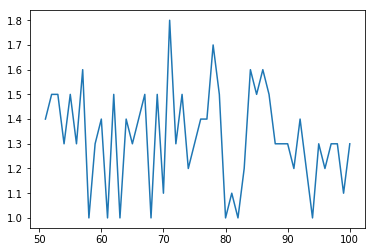

In [46]:
a=Iris_versicolor_data['Id'].values
b=Iris_versicolor_data['PetalWidthCm'].values
plt.plot(a,b)   

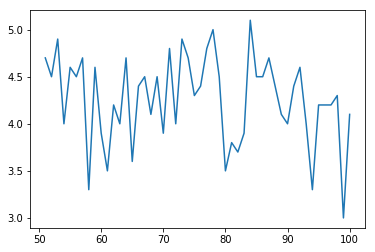

In [47]:
a=Iris_versicolor_data['Id'].values
b=Iris_versicolor_data['PetalLengthCm'].values
plt.plot(a,b)